In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as ss

In [2]:
import numpy as np

#finding the distante between two points
def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2-p1,2)))

p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1,p2)

4.242640687119285

In [3]:
votes = [1,2,3,1,2,3,2,3,2,3,2,1,3]

In [4]:
def majority_vote(votes):
    """return the most common element in votes. if there is a tie it will pick randomly."""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    winners = []
    max_counts = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
        
    return random.choice(winners)

In [5]:
vote_counts = majority_vote(votes)
vote_counts

2

In [6]:
#short version
#def majority_vote(votes):
#    """return the most commom element in votes"""
#    mode, counts = ss.mode(votes)    
#    return mode

#using this method, if there is more than one such value, only the smallest is returned.

In [7]:
vote_counts = majority_vote(votes)
vote_counts

3

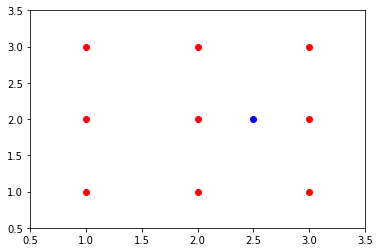

In [8]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5]);

In [9]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

In [10]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [11]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [12]:
#finding the nearest neighbors:
#loop over all points
    #compute the distance beetween point p and every other point
#sort distances and return those k points that are nearest to point p
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neightbors of point p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [13]:
ind = find_nearest_neighbors(p, points, 2); print(points[ind])

[[2 2]
 [3 2]]


In [14]:
ind = find_nearest_neighbors(p, points, 4); print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [15]:
def knn_predict(p, points, outcomes, k=5):
    # find k nearest neighbors
    # predict the class/category of p based on majority vote
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [16]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

knn_predict(np.array([2.5, 2.7]), points, outcomes, k=3)

1

In [17]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=3)

0

Generating sintetic data

In [18]:
#we'll generate predictors from two
#bivariate normal distributions, where the first distribution gives rise
#to observations belonging to class 0, and the second gives rise
#to observations belonging to class 1.
#The word, bivariate, just means 2 variables, like x and y.
#random variates with mean 0 and standard deviation 1
ss.norm(0,1).rvs((5,2))

array([[-0.3765362 ,  0.07629688],
       [ 0.48249711, -0.03830429],
       [ 0.25603567, -0.83119983],
       [ 0.42200502,  1.28999902],
       [-0.45460126, -1.75705015]])

In [19]:
points = np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis=0)
#concatenating the two classes along rows
points

array([[ 1.09656102,  0.96327859],
       [ 0.38206635, -1.64414698],
       [-0.9134242 , -0.71182887],
       [-0.41289468, -0.36723127],
       [ 1.27646175,  1.4803049 ],
       [ 1.08985198,  1.18404033],
       [ 1.53936112,  1.30528123],
       [ 1.70310343,  0.07475192],
       [ 0.88272115, -0.0919426 ],
       [ 0.23221206,  1.24744171]])

In [20]:
#np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
n=5
np.concatenate((np.repeat(0,n), np.repeat(1, n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [21]:
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1, n)))
    return (points, outcomes)

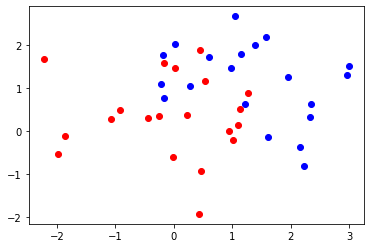

In [22]:
n = 20
(points, outcomes) = generate_synth_data(n)

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro") #1st class
plt.plot(points[n:,0], points[n:,1], "bo") #2nd class
plt.savefig("bivardata.pdf")

In [23]:
def make_prediction_grid(predictors, outcomes ,limits, h, k):
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    
    return (xx, yy, prediction_grid)
    

In [24]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [25]:
(predictors, outcomes) = generate_synth_data()

In [26]:
predictors.shape

(100, 2)

#### K = 5

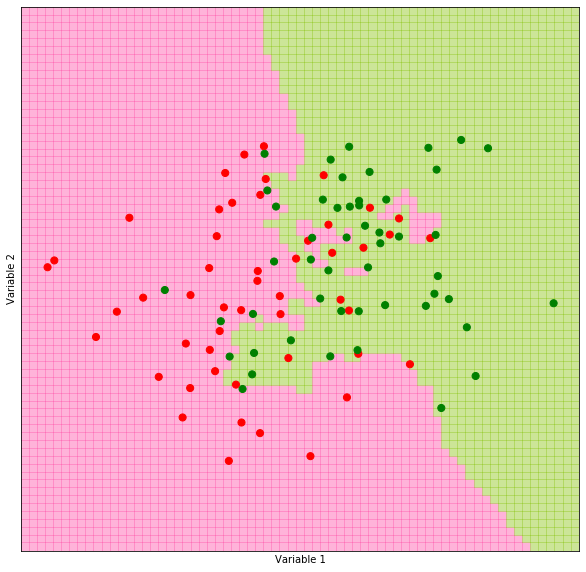

In [27]:
k=5; filename="knn_synth_5.pdf"; limits = (-3,4,-3,4); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes ,limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

#### K = 50

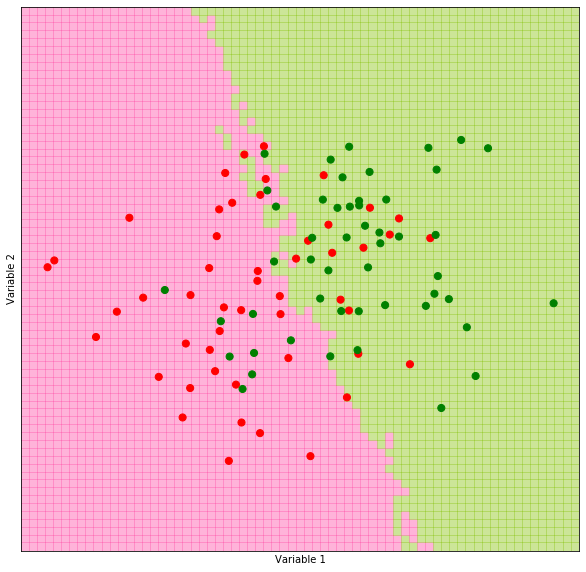

In [28]:
k=50; filename="knn_synth_50.pdf"; limits = (-3,4,-3,4); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes ,limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

<!--.-->

<!--.-->

Iris dataset:

In [29]:
from sklearn import datasets

In [30]:
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
len(iris.data) , len(iris.target)

(150, 150)

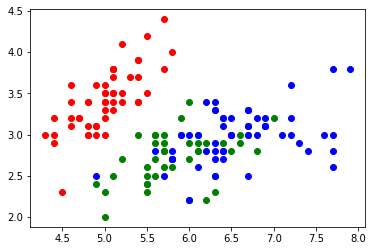

In [33]:
predictors = iris.data[:,0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo");

Using the handmade KNN:

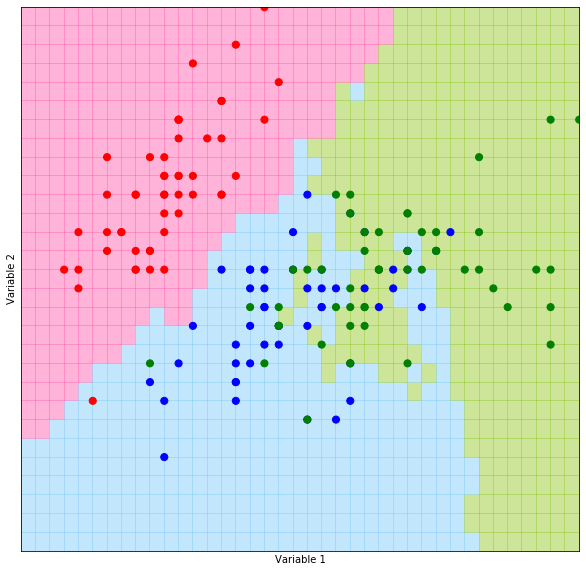

In [34]:
k=5; filename="iris_grid.pdf"; limits = (4,8,1.5,4.5); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes ,limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

In [36]:
#sklearn KNN predictions
sk_predictions.shape

(150,)

In [37]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

(150,)

In [38]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
print(100*np.mean(sk_predictions == my_predictions))

96.0


Our predictions and sklearn predictions agrees 96% of the time.

In [40]:
print(100*np.mean(my_predictions == outcomes))

84.66666666666667


Our predictions have a 85% accuracy classification regarding the real outcomes.